# Chapter 5: SVMs

## 1. Linear SVM

### 1.1 Hard Margin SVM

__Notes__ :
   - Only works if data is linearly separable
   - Sensitive to outliers!

In [1]:
# Setup

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

# Graph settings
mpl.rc('axes', labelsize = 14)
mpl.rc('xtick', labelsize = 12)
mpl.rc('ytick', labelsize = 12)

# Seed
np.random.seed(42)

#### 1.1.1 Large margin classification

In [2]:
# Load the modules
from sklearn.svm import SVC
from sklearn import datasets

# Dataset
iris = datasets.load_iris()
X = iris["data"][:, (2, 3)] # petal length & width
y = iris["target"]

# Choose two classes
setosa_or_versicolor = (y == 0) | (y == 1)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]

In [3]:
# Build linear SVM classifier with no cost/infinite margin

svm_clf = SVC(kernel = "linear", C = float("inf"))
svm_clf.fit(X, y)

SVC(C=inf, kernel='linear')

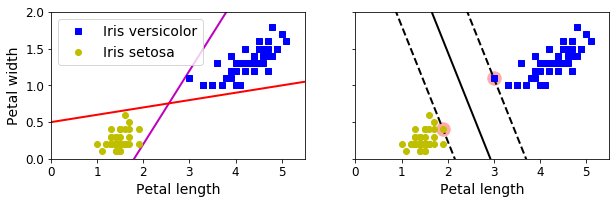

In [5]:
# Plot the SVM and class separation

# Bad models
x0 = np.linspace(0, 5.5, 200)
pred_1 = 5*x0 - 20
pred_2 = x0 - 1.8
pred_3 = 0.1*x0 + 0.5

def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    # Model coefficients
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]
    
    # At decision boundary, add w0*x0 + w1*x1 + b = 0
    # -> x1 = -w0/w1 * x0 - b/w1
    
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]
    
    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin
    
    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s = 180, facecolors = '#FFAAAA')
    plt.plot(x0, decision_boundary, "k-", linewidth = 2)
    plt.plot(x0, gutter_up, "k--", linewidth = 2)
    plt.plot(x0, gutter_down, "k--", linewidth = 2)
    
fig, axes = plt.subplots(ncols = 2, figsize = (10, 2.7), sharey = True)

# Handmade separation
plt.sca(axes[0])
plt.plot(x0, pred_2, "m-", linewidth=2)
plt.plot(x0, pred_3, "r-", linewidth=2)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris versicolor")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris setosa")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 5.5, 0, 2])

# Margin with inf cost budget; support vectors highlighted!
plt.sca(axes[1])
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
plt.xlabel("Petal length", fontsize=14)
plt.axis([0, 5.5, 0, 2])

plt.show()

#### 1.1.2 Sensitivity to feature scale

SVMs are sensitive to scale due to dot product formulation -- good to scale before making decision boundary!

In [6]:
# Sample data

Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

# Fit a SVM classifier to this sample data with budget = 100
svm_clf = SVC(kernel = "linear", C = 100)
svm_clf.fit(Xs, ys)

SVC(C=100, kernel='linear')

[-2, 2, -2, 2]

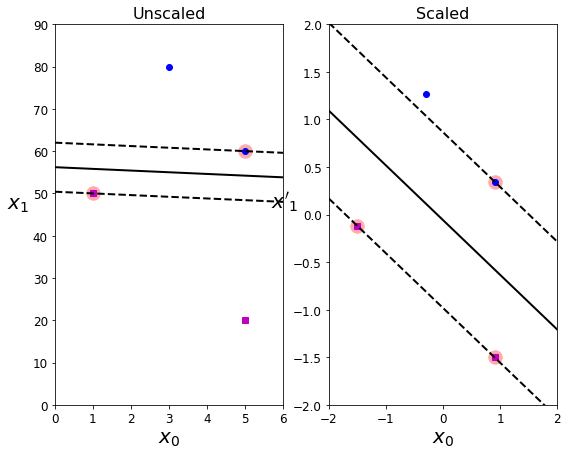

In [8]:
# Plot the output of the unscaled data

plt.figure(figsize = (9, 7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys==1], Xs[:, 1][ys==1], "bo")
plt.plot(Xs[:, 0][ys==0], Xs[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x_1$    ", fontsize=20, rotation=0)
plt.title("Unscaled", fontsize=16)
plt.axis([0, 6, 0, 90])

# Scale the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(Xs)
svm_clf.fit(X_scaled, ys)

# Plot the output of the scaled data
plt.subplot(122)
plt.plot(X_scaled[:, 0][ys==1], X_scaled[:, 1][ys==1], "bo")
plt.plot(X_scaled[:, 0][ys==0], X_scaled[:, 1][ys==0], "ms")
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x_0$", fontsize=20)
plt.ylabel("$x'_1$  ", fontsize=20, rotation=0)
plt.title("Scaled", fontsize=16)
plt.axis([-2, 2, -2, 2])

#### 1.1.3 Outlier sensitivity

In [9]:
# Make example data

X_outliers = np.array([[3.4, 1.3], [3.2, 0.8]])
y_outliers = np.array([0, 0])

Xo1 = np.concatenate([X, X_outliers[:1]], axis = 0)
yo1 = np.concatenate([y, y_outliers[:1]], axis = 0)

Xo2 = np.concatenate([X, X_outliers[1:]], axis = 0)
yo2 = np.concatenate([y, y_outliers[1:]], axis = 0)

In [10]:
# Fit an svm on the outlier data

svm_clf2 = SVC(kernel = "linear", C = 10**9)
svm_clf2.fit(Xo2, yo2)

SVC(C=1000000000, kernel='linear')

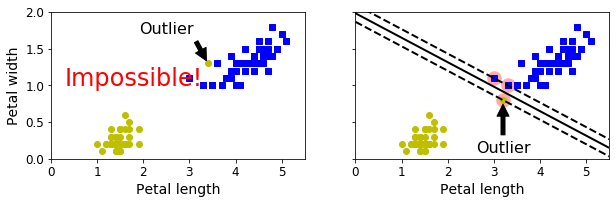

In [12]:
# Plot the results
fig, axes = plt.subplots(ncols=2, figsize=(10,2.7), sharey=True)

# In the first outlier case, the data are not linearly separable
plt.sca(axes[0])
plt.plot(Xo1[:, 0][yo1==1], Xo1[:, 1][yo1==1], "bs")
plt.plot(Xo1[:, 0][yo1==0], Xo1[:, 1][yo1==0], "yo")
plt.text(0.3, 1.0, "Impossible!", fontsize=24, color="red")
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[0][0], X_outliers[0][1]),
             xytext=(2.5, 1.7),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

# In this case, the outlier skews the margin
plt.sca(axes[1])
plt.plot(Xo2[:, 0][yo2==1], Xo2[:, 1][yo2==1], "bs")
plt.plot(Xo2[:, 0][yo2==0], Xo2[:, 1][yo2==0], "yo")
plot_svc_decision_boundary(svm_clf2, 0, 5.5)
plt.xlabel("Petal length", fontsize=14)
plt.annotate("Outlier",
             xy=(X_outliers[1][0], X_outliers[1][1]),
             xytext=(3.2, 0.08),
             ha="center",
             arrowprops=dict(facecolor='black', shrink=0.1),
             fontsize=16,
            )
plt.axis([0, 5.5, 0, 2])

plt.show()

### 1.2 Soft Margin Classification

Want to allow for some false classifications due to noise and generalization -- $C$ as hyperparameter

In [15]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = datasets.load_iris()
X = iris["data"][:, (2, 3)]
y = (iris["target"] == 2).astype(np.float64)

# Make pipeline for svm with standardization and hinge loss to remove outlier effect

svm_clf = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", LinearSVC(C = 1, loss = "hinge", random_state = 42))
])

svm_clf.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc', LinearSVC(C=1, loss='hinge', random_state=42))])

In [16]:
# Example prediction

svm_clf.predict([[5.5, 1.7]])

array([1.])

In [17]:
# Gemerate graph to compare different budgets/regularization settings

scaler = StandardScaler()
svm_clf1 = LinearSVC(C = 1, loss = "hinge", random_state = 42)
svm_clf2 = LinearSVC(C = 100, loss = "hinge", random_state = 42)

scaled_svm_clf1 = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", svm_clf1)
])

scaled_svm_clf2 = Pipeline([
    ("scaler", StandardScaler()),
    ("linear_svc", svm_clf2)
])

# Fit the models

scaled_svm_clf1.fit(X, y)
scaled_svm_clf2.fit(X, y)

C:\Users\rschm\Anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Pipeline(steps=[('scaler', StandardScaler()),
                ('linear_svc',
                 LinearSVC(C=100, loss='hinge', random_state=42))])

In [24]:
scaler.fit(X)

StandardScaler()

In [25]:
scaler.mean_

array([3.758     , 1.19933333])

In [18]:
# Convert back to unscaled parameters

b1 = svm_clf1.decision_function([-scaler.mean_ / scaler.scale_])
b2 = svm_clf2.decision_function([-scaler.mean_ / scaler.scale_])

w1 = svm_clf1.coef_[0] / scaler.scale_
w2 = svm_clf2.coef_[0] / scaler.scale_


# Overwrite the svm with unscaled coefs for plotting
svm_clf1.intercept_ = np.array([b1])
svm_clf2.intercept_ = np.array([b2])

svm_clf1.coef_ = np.array([w1])
svm_clf2.coef_ = np.array([w2])


# Find support vectors (not done automatically in LinearSVC)
t = y * 2 - 1

# Indices
support_vectors_idx1 = (t * (X.dot(w1) + b1) < 1).ravel()
support_vectors_idx2 = (t * (X.dot(w2) + b2) < 1).ravel()

svm_clf1.support_vectors_ = X[support_vectors_idx1]
svm_clf2.support_vectors_ = X[support_vectors_idx2]

AttributeError: 'StandardScaler' object has no attribute 'mean_'